# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


# Reference:

Principal Components Analysis (PCA) | 主成份分析 | R 統計
https://www.jamleecute.com/principal-components-analysis-pca-%E4%B8%BB%E6%88%90%E4%BB%BD%E5%88%86%E6%9E%90/

機器/統計學習:主成分分析(Principal Component Analysis, PCA)
https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8-%E7%B5%B1%E8%A8%88%E5%AD%B8%E7%BF%92-%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90-principle-component-analysis-pca-58229cd26e71

世上最生動的 PCA：直觀理解並應用主成分分析
https://leemeng.tw/essence-of-principal-component-analysis.html

多維度資料視覺化呈現的好夥伴－主成份分析法(PCA)
https://medium.com/life-of-small-data-engineer/%E5%A4%9A%E7%B6%AD%E5%BA%A6%E8%B3%87%E6%96%99%E8%A6%96%E8%A6%BA%E5%8C%96%E5%91%88%E7%8F%BE%E7%9A%84%E5%A5%BD%E5%A4%A5%E4%BC%B4-%E4%B8%BB%E6%88%90%E4%BB%BD%E5%88%86%E6%9E%90%E6%B3%95-d7b2ce7d8ce7

In [24]:
from sklearn import datasets

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

#print(X)
#print(y)
#print(digits)

載入 相關套件 並 執行 PCA 實驗 ...

In [25]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# 降到2維

pca = PCA(n_components=2)#要降到多少維度
pca.fit(X)

result = pca.transform(X)#取得降維之後的結果
print(result)
print('====================================================')
print(pca.components_) # components_ 為組成此 PCA 結果的各項係數

[[ 28.47993992  -3.43359359]
 [-22.59666568  17.80122274]
 [ -8.83188035  11.46680509]
 ...
 [-22.05029473 -16.58404598]
 [-16.44102253 -17.48311967]
 [ 28.5723742    1.03814293]]
[[ 2.13055978e-21 -1.21964935e-02 -5.25084566e-02 -2.10317545e-03
   4.47366764e-02  2.01997079e-02 -7.38594906e-04 -2.07614061e-28
  -1.23685484e-04 -4.54418471e-02  8.98877321e-02 -8.59447462e-03
  -4.75472753e-02  1.64055322e-01  1.89174764e-02  0.00000000e+00
  -1.10636412e-04  2.69101227e-02  1.76718429e-01 -1.28165819e-01
  -2.74120959e-01  1.87117934e-01  8.52428732e-02  0.00000000e+00
  -2.30404990e-05  9.94000428e-02  1.81526613e-01 -2.16705737e-01
  -3.23556620e-01  1.44327292e-01  1.53759553e-01  0.00000000e+00
   0.00000000e+00  1.27451165e-01  1.69267138e-01 -2.73367498e-01
  -2.97722517e-01  1.64240637e-01  1.67794273e-01  0.00000000e+00
   0.00000000e+00  7.41864771e-02  1.77488816e-01 -2.67844593e-01
  -2.16078594e-01  2.11556920e-01  1.25615800e-01 -1.67864930e-04
  -5.91639463e-05  3.3436618

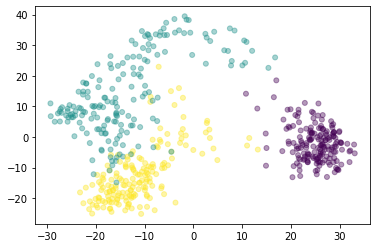

In [27]:
# 使用 matplotlib 將結果繪出
# 前兩個參數是各個點的 x,y 座標值
# c 是按照每筆資料的類別數值(1~9)，自動著色

plt.scatter(result[:,0], result[:,1], c=y, s=25, alpha=0.4, marker='o')

In [28]:
# 降到3維

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)
%matplotlib inline

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

#設定 模型 估計參數
centers = [[1, 1], [-1, -1], [1, -1]]
pca = decomposition.PCA(n_components=3)

pca.fit(X)
X = pca.transform(X)

print(X)

[[ 28.47993992  -3.43359359   1.03184835]
 [-22.59666568  17.80122274   6.11085609]
 [ -8.83188035  11.46680509   2.01624684]
 ...
 [-22.05029473 -16.58404599  -5.73396933]
 [-16.44102253 -17.48311967  -3.95362923]
 [ 28.5723742    1.03814293   5.45381184]]


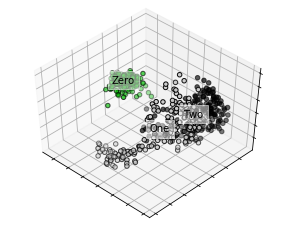

In [29]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()


for name, label in [('Zero', 0), ('One', 1), ('Two', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()